# Importing Libraries

In [1]:
#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge folium=0.5.0 --yes

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import urllib.request
from bs4 import BeautifulSoup
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderNotFound
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import folium
from sklearn.cluster import KMeans
%matplotlib inline
print("All libs imported")

All libs imported


Reading Suburbs Population data Excel file 

In [2]:
#Reading data file from excel file
df = pd.read_excel("Chicago_Suburbs_data_2.xlsx", index=False)
df.head()

,City,Clarendon Hills village,Buffalo Grove village,Long Grove village,Naperville city,Evanston city,Oak Park village,Hinsdale village,Western Springs village,Vernon Hills village,Wilmette village,Wheaton city,Highland Park city,Libertyville village,La Grange village,Northbrook village,Glencoe village,La Grange Park village,Glen Ellyn village,Lisle village,Deerfield village
0,PE2019,8752.000,40494.000,7905.000,148449.000,73473.000,52381.000,17637.000,13359.000,26521.000,27089.000,52745.000,29515.000,20205.000,15322.000,32958.000,8826.000,13178.000,27714.000,23270.000,18646.000
1,PE2010,8431.000,41503.000,7921.000,142170.000,74483.000,51878.000,16845.000,12948.000,25005.000,27060.000,53045.000,29745.000,20405.000,15554.000,33200.000,8721.000,13580.000,27773.000,22552.000,18227.000
2,PChange,0.038,-0.024,-0.002,0.044,-0.014,0.010,0.047,0.032,0.061,0.001,-0.006,-0.008,-0.010,-0.015,-0.007,0.012,-0.030,-0.002,0.032,0.023
3,U18,0.334,0.226,0.241,0.256,0.200,0.243,0.316,0.318,0.262,0.285,0.230,0.245,0.246,0.292,0.219,0.294,0.260,0.267,0.189,0.274
4,A65,0.115,0.147,0.150,0.117,0.147,0.144,0.140,0.157,0.132,0.188,0.151,0.220,0.160,0.143,0.270,0.171,0.188,0.159,0.151,0.158


# Data Wrangling

In [3]:
#transpose the dataframe
df1 = df.T
df1.head()

,0,1,2,3,4,5,6,7,8,9
City,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea
Clarendon Hills village,8752,8431,0.038,0.334,0.115,0.762,126500,73245,0.05,1.8
Buffalo Grove village,40494,41503,-0.024,0.226,0.147,0.665,111435,53380,0.044,9.5
Long Grove village,7905,7921,-0.002,0.241,0.15,0.712,208250,80896,0.023,12.48
Naperville city,148449,142170,0.044,0.256,0.117,0.678,118187,53061,0.044,38.77


In [4]:
#renaming column name and dropping first row
#grab the first row for the header
new_header = df1.iloc[0] 
#take the data less the header row
df1 = df1[1:] 
df1.columns = new_header

df1.head()


City,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea
Clarendon Hills village,8752,8431,0.038,0.334,0.115,0.762,126500,73245,0.05,1.8
Buffalo Grove village,40494,41503,-0.024,0.226,0.147,0.665,111435,53380,0.044,9.5
Long Grove village,7905,7921,-0.002,0.241,0.15,0.712,208250,80896,0.023,12.48
Naperville city,148449,142170,0.044,0.256,0.117,0.678,118187,53061,0.044,38.77
Evanston city,73473,74483,-0.014,0.2,0.147,0.657,77848,49263,0.133,7.78


In [5]:
df1.reset_index(inplace = True)
df1.head()

City,index,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea
0,Clarendon Hills village,8752,8431,0.038,0.334,0.115,0.762,126500,73245,0.05,1.8
1,Buffalo Grove village,40494,41503,-0.024,0.226,0.147,0.665,111435,53380,0.044,9.5
2,Long Grove village,7905,7921,-0.002,0.241,0.15,0.712,208250,80896,0.023,12.48
3,Naperville city,148449,142170,0.044,0.256,0.117,0.678,118187,53061,0.044,38.77
4,Evanston city,73473,74483,-0.014,0.2,0.147,0.657,77848,49263,0.133,7.78


In [6]:
df1.rename(columns={'index':'Suburb'},inplace = True)
df1.head()

City,Suburb,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea
0,Clarendon Hills village,8752,8431,0.038,0.334,0.115,0.762,126500,73245,0.05,1.8
1,Buffalo Grove village,40494,41503,-0.024,0.226,0.147,0.665,111435,53380,0.044,9.5
2,Long Grove village,7905,7921,-0.002,0.241,0.15,0.712,208250,80896,0.023,12.48
3,Naperville city,148449,142170,0.044,0.256,0.117,0.678,118187,53061,0.044,38.77
4,Evanston city,73473,74483,-0.014,0.2,0.147,0.657,77848,49263,0.133,7.78


In [7]:
#Getting Latitude and Longitude of the cities
from opencage.geocoder import OpenCageGeocode

key = 'b80ee70222614176a9cde2d275cfc6dd'  # get api key from:  https://opencagedata.com

geocoder = OpenCageGeocode(key)

# create empty lists
list_lat = []   

list_long = []



for index, row in df1.iterrows(): # iterate over rows in dataframe



    City = row['Suburb']       
    query = str(City)+',Illinois'

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)


# create new columns from lists    

df1['lat'] = list_lat   

df1['lon'] = list_long

df1.head()

City,Suburb,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea,lat,lon
0,Clarendon Hills village,8752,8431,0.038,0.334,0.115,0.762,126500,73245,0.05,1.8,41.796124,-87.955143
1,Buffalo Grove village,40494,41503,-0.024,0.226,0.147,0.665,111435,53380,0.044,9.5,42.167583,-87.955640
2,Long Grove village,7905,7921,-0.002,0.241,0.15,0.712,208250,80896,0.023,12.48,42.178358,-87.997852
3,Naperville city,148449,142170,0.044,0.256,0.117,0.678,118187,53061,0.044,38.77,41.772870,-88.147928
4,Evanston city,73473,74483,-0.014,0.2,0.147,0.657,77848,49263,0.133,7.78,42.044739,-87.693046


In [8]:
df1.head()

City,Suburb,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea,lat,lon
0,Clarendon Hills village,8752,8431,0.038,0.334,0.115,0.762,126500,73245,0.05,1.8,41.796124,-87.955143
1,Buffalo Grove village,40494,41503,-0.024,0.226,0.147,0.665,111435,53380,0.044,9.5,42.167583,-87.955640
2,Long Grove village,7905,7921,-0.002,0.241,0.15,0.712,208250,80896,0.023,12.48,42.178358,-87.997852
3,Naperville city,148449,142170,0.044,0.256,0.117,0.678,118187,53061,0.044,38.77,41.772870,-88.147928
4,Evanston city,73473,74483,-0.014,0.2,0.147,0.657,77848,49263,0.133,7.78,42.044739,-87.693046


In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
df1.shape

(20, 13)

In [289]:
#Chicago Coordinate

query = 'Chicago,Illinois'
results = geocoder.geocode(query)
#print (results)



In [12]:
#Chicago Latitude & Longitude

lat = results[0]['geometry']['lat']

lng = results[0]['geometry']['lng']

print (lat, lng)

41.8755616 -87.6244212


In [13]:
#Chicago Map

map_chicago = folium.Map(location=[lat, lng], zoom_start=10)

map_chicago

In [16]:
#Mapping 20 Chicago Suburbs

map_chicago = folium.Map(location=[lat, lng], zoom_start=9.47)

for lat, lon, suburb in zip(df1['lat'], df1['lon'], df1['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)
    
map_chicago

In [30]:
map_chicago.save('Top20_Suburbs.html')


In [17]:
#sorting by Median Income
df2 = df1.sort_values(by='MIncome', ascending = False)
df2

City,Suburb,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea,lat,lon
15,Glencoe village,8826,8721,0.012,0.294,0.171,0.864,209143,130020,0.023,3.72,42.135027,-87.758119
2,Long Grove village,7905,7921,-0.002,0.241,0.15,0.712,208250,80896,0.023,12.48,42.178358,-87.997852
6,Hinsdale village,17637,16845,0.047,0.316,0.14,0.803,188684,92734,0.029,4.6,41.802460,-87.929984
7,Western Springs village,13359,12948,0.032,0.318,0.157,0.784,161563,71004,0.032,2.79,41.809613,-87.900671
9,Wilmette village,27089,27060,0.001,0.285,0.188,0.815,154738,82805,0.033,5.4,42.075732,-87.719377
11,Highland Park city,29515,29745,-0.008,0.245,0.22,0.744,147962,86964,0.05,12.2,42.181692,-87.800344
19,Deerfield village,18646,18227,0.023,0.274,0.158,0.786,144229,74334,0.027,5.58,42.171137,-87.844512
12,Libertyville village,20205,20405,-0.01,0.246,0.16,0.701,130732,64831,0.031,8.81,42.283079,-87.953130
0,Clarendon Hills village,8752,8431,0.038,0.334,0.115,0.762,126500,73245,0.05,1.8,41.796124,-87.955143
14,Northbrook village,32958,33200,-0.007,0.219,0.27,0.692,123457,67306,0.03,13.19,39.959136,-91.375919


In [18]:
Top_MI = df2.head(5)
Top_MI

City,Suburb,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea,lat,lon
15,Glencoe village,8826,8721,0.012,0.294,0.171,0.864,209143,130020,0.023,3.72,42.135027,-87.758119
2,Long Grove village,7905,7921,-0.002,0.241,0.15,0.712,208250,80896,0.023,12.48,42.178358,-87.997852
6,Hinsdale village,17637,16845,0.047,0.316,0.14,0.803,188684,92734,0.029,4.6,41.802460,-87.929984
7,Western Springs village,13359,12948,0.032,0.318,0.157,0.784,161563,71004,0.032,2.79,41.809613,-87.900671
9,Wilmette village,27089,27060,0.001,0.285,0.188,0.815,154738,82805,0.033,5.4,42.075732,-87.719377


In [23]:
#Top 5 cities with highest median income
map_chicago2 = folium.Map(location=[lat, lng], zoom_start=9.47)

for lat, lon, suburb in zip(Top_MI['lat'], Top_MI['lon'], Top_MI['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago2)
    
map_chicago2

In [29]:
map_chicago2.save('Top5_MI_Suburbs.html')


# Foursquare

In [83]:
CLIENT_ID = 'I3Y4SR5SYR3MKZ4DSXH425RUMIJQKNDYYVRWZEQ3XIZOJ1UV' # your Foursquare ID
CLIENT_SECRET = 'UISNZPKNKOAXBSEBRLPTAP4MVQFLVIUO3CO025OO0EBYOR55' # your Foursquare Secret
VERSION = '20200629'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I3Y4SR5SYR3MKZ4DSXH425RUMIJQKNDYYVRWZEQ3XIZOJ1UV
CLIENT_SECRET:UISNZPKNKOAXBSEBRLPTAP4MVQFLVIUO3CO025OO0EBYOR55


In [89]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit=100'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [90]:
venues = getNearbyVenues(df1['Suburb'], df1['lat'], df1['lon'])

venues.head()

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Clarendon Hills village,41.796124,-87.955143,Little Creperie,41.795544,-87.954201,Sandwich Place
1,Clarendon Hills village,41.796124,-87.955143,Talley's Kitchen & Bar,41.795957,-87.954205,American Restaurant
2,Clarendon Hills village,41.796124,-87.955143,Domino's Pizza,41.796061,-87.954803,Pizza Place
3,Clarendon Hills village,41.796124,-87.955143,Starbucks,41.795560,-87.954420,Coffee Shop
4,Clarendon Hills village,41.796124,-87.955143,Metra - Clarendon Hills,41.797215,-87.953626,Train Station


In [91]:
venues.shape

(449, 7)

In [288]:
venues.head()

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Clarendon Hills village,41.796124,-87.955143,Little Creperie,41.795544,-87.954201,Sandwich Place
1,Clarendon Hills village,41.796124,-87.955143,Talley's Kitchen & Bar,41.795957,-87.954205,American Restaurant
2,Clarendon Hills village,41.796124,-87.955143,Domino's Pizza,41.796061,-87.954803,Pizza Place
3,Clarendon Hills village,41.796124,-87.955143,Starbucks,41.795560,-87.954420,Coffee Shop
4,Clarendon Hills village,41.796124,-87.955143,Metra - Clarendon Hills,41.797215,-87.953626,Train Station


In [93]:
venues.groupby('Suburb').count()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Buffalo Grove village,5,5,5,5,5,5
Clarendon Hills village,11,11,11,11,11,11
Deerfield village,23,23,23,23,23,23
Evanston city,6,6,6,6,6,6
Glen Ellyn village,27,27,27,27,27,27
Glencoe village,17,17,17,17,17,17
Highland Park city,29,29,29,29,29,29
Hinsdale village,36,36,36,36,36,36
La Grange Park village,12,12,12,12,12,12


In [104]:
Top_MI

City,Suburb,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea,lat,lon
15,Glencoe village,8826,8721,0.012,0.294,0.171,0.864,209143,130020,0.023,3.72,42.135027,-87.758119
2,Long Grove village,7905,7921,-0.002,0.241,0.15,0.712,208250,80896,0.023,12.48,42.178358,-87.997852
6,Hinsdale village,17637,16845,0.047,0.316,0.14,0.803,188684,92734,0.029,4.6,41.802460,-87.929984
7,Western Springs village,13359,12948,0.032,0.318,0.157,0.784,161563,71004,0.032,2.79,41.809613,-87.900671
9,Wilmette village,27089,27060,0.001,0.285,0.188,0.815,154738,82805,0.033,5.4,42.075732,-87.719377


In [105]:
#Analyzing top 5 high median income Suburbs
venues_TopMI = getNearbyVenues(Top_MI['Suburb'], Top_MI['lat'], Top_MI['lon'])

venues_TopMI.head()

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Glencoe village,42.135027,-87.758119,Guildhall,42.133759,-87.759440,Bistro
1,Glencoe village,42.135027,-87.758119,Starbucks,42.134399,-87.759512,Coffee Shop
2,Glencoe village,42.135027,-87.758119,An Apple A Day Catering & Meg's Cafe,42.134825,-87.758639,Café
3,Glencoe village,42.135027,-87.758119,Writers Theatre - Tudor Court,42.134940,-87.759427,Theater
4,Glencoe village,42.135027,-87.758119,Glencoe Roast Coffee,42.134157,-87.759845,Coffee Shop


In [106]:
venues_TopMI.shape

(102, 7)

In [287]:
venues_TopMI.head()

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Glencoe village,42.135027,-87.758119,Guildhall,42.133759,-87.759440,Bistro
1,Glencoe village,42.135027,-87.758119,Starbucks,42.134399,-87.759512,Coffee Shop
2,Glencoe village,42.135027,-87.758119,An Apple A Day Catering & Meg's Cafe,42.134825,-87.758639,Café
3,Glencoe village,42.135027,-87.758119,Writers Theatre - Tudor Court,42.134940,-87.759427,Theater
4,Glencoe village,42.135027,-87.758119,Glencoe Roast Coffee,42.134157,-87.759845,Coffee Shop


In [108]:
venues_TopMI.groupby('Suburb').count()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Glencoe village,17,17,17,17,17,17
Hinsdale village,36,36,36,36,36,36
Long Grove village,22,22,22,22,22,22
Western Springs village,18,18,18,18,18,18
Wilmette village,9,9,9,9,9,9


In [109]:
#For all Suburb
# one hot encoding
all_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
all_onehot['Suburb'] = venues['Suburb'] 

# move neighborhood column to the first column
fixed_columns = [all_onehot.columns[-1]] + list(all_onehot.columns[:-1])
all_onehot = all_onehot[fixed_columns]

all_onehot.head()

,Suburb,ATM,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Butcher,Café,Campground,Candy Store,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Doctor's Office,Donut Shop,Electronics Store,Farmers Market,Financial or Legal Service,Flea Market,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Ice Cream Shop,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Store,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Other Repair Shop,Park,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Record Shop,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Travel & Transport,Vietnamese Restaurant,Wine Bar,Winery,Women's Store,Yoga Studio
0,Clarendon Hills village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Clarendon Hills village,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Clarendon Hills village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Clarendon Hills village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Clarendon Hills village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [110]:
all_grouped = all_onehot.groupby('Suburb').mean().reset_index()
all_grouped.head()

,Suburb,ATM,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Butcher,Café,Campground,Candy Store,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Doctor's Office,Donut Shop,Electronics Store,Farmers Market,Financial or Legal Service,Flea Market,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Ice Cream Shop,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Store,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Other Repair Shop,Park,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Record Shop,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Travel & Transport,Vietnamese Restaurant,Wine Bar,Winery,Women's Store,Yoga Studio
0,Buffalo Grove village,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.200000,0.0,0.0,0.000000,0.000000,0.400000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Clarendon Hills village,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.090909,0.0,0.0,0.0,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.181818,0.090909,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.0
2,Deerfield village,0.043478,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.043478,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.043478,0.0,0.0,0.043478,0.0,0.086957,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.086957,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086957,0.0,0.0,0.0,0.0,0.0,0.043478,0.000000,0.000000,0.0,0.000000,0.000000,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,

In [112]:
#for Top 5 Median Income Suburbs
top5_onehot = pd.get_dummies(venues_TopMI[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
top5_onehot['Suburb'] = venues_TopMI['Suburb'] 

# move neighborhood column to the first column
fixed_columns = [top5_onehot.columns[-1]] + list(top5_onehot.columns[:-1])
top5_onehot = top5_onehot[fixed_columns]

top5_onehot.head()

,Suburb,ATM,American Restaurant,Antique Shop,Arts & Crafts Store,Auto Garage,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bistro,Boutique,Breakfast Spot,Brewery,Butcher,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dessert Shop,Diner,Doctor's Office,Farmers Market,Gift Shop,Gourmet Shop,Grocery Store,Gym,Hardware Store,History Museum,Hot Dog Joint,Ice Cream Shop,Italian Restaurant,Jewelry Store,Library,Locksmith,Massage Studio,Moving Target,Music Store,Optical Shop,Park,Pet Store,Pharmacy,Pizza Place,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Shipping Store,Smoke Shop,Snack Place,Spa,Sports Bar,Sushi Restaurant,Theater,Trail,Train Station,Travel & Transport,Wine Bar,Yoga Studio
0,Glencoe village,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Glencoe village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Glencoe village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Glencoe village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Glencoe village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
top5_grouped = top5_onehot.groupby('Suburb').mean().reset_index()
top5_grouped.head()

,Suburb,ATM,American Restaurant,Antique Shop,Arts & Crafts Store,Auto Garage,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bistro,Boutique,Breakfast Spot,Brewery,Butcher,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dessert Shop,Diner,Doctor's Office,Farmers Market,Gift Shop,Gourmet Shop,Grocery Store,Gym,Hardware Store,History Museum,Hot Dog Joint,Ice Cream Shop,Italian Restaurant,Jewelry Store,Library,Locksmith,Massage Studio,Moving Target,Music Store,Optical Shop,Park,Pet Store,Pharmacy,Pizza Place,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Shipping Store,Smoke Shop,Snack Place,Spa,Sports Bar,Sushi Restaurant,Theater,Trail,Train Station,Travel & Transport,Wine Bar,Yoga Studio
0,Glencoe village,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.117647,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.058824,0.000000,0.000000,0.000000
1,Hinsdale village,0.027778,0.027778,0.000000,0.000000,0.000000,0.027778,0.083333,0.000000,0.027778,0.000000,0.000000,0.027778,0.027778,0.000000,0.000000,0.000000,0.027778,0.027778,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.027778,0.000000,0.027778,0.027778,0.000000,0.000000,0.055556,0.027778,0.027778,0.055556,0.000000,0.000000,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.055556,0.000000,0.000000,0.027778,0.000000,0.027778,0.000000,0.000000,0.027778,0.000000,0.000000,0.055556
2,Long Grove village,0.000000,0.045455,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.090909,0.000000,0.000000,0.045455,0.045455,0.000000,0.000000,0.045455,0.000000,0.000000,0.045455,0.227273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000
3,Western Springs village,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.055556,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.055556,0.055556,0.055556,0.000000,0.055556,0.055556,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000
4,Wilmette village,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [114]:
# Define a function for top venus for a neighborhood
num_top_venues=10
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [116]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
all_sorted = pd.DataFrame(columns=columns)
all_sorted['Suburb'] = all_grouped['Suburb']

for ind in np.arange(all_grouped.shape[0]):
    all_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)

all_sorted

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Buffalo Grove village,Playground,Home Service,Campground,Park,Doctor's Office,Flea Market,Financial or Legal Service,Farmers Market,Electronics Store,Donut Shop
1,Clarendon Hills village,Pizza Place,Thai Restaurant,Deli / Bodega,Sandwich Place,Mexican Restaurant,Platform,Coffee Shop,Train Station,Ice Cream Shop,American Restaurant
2,Deerfield village,Coffee Shop,Gym / Fitness Center,Frozen Yogurt Shop,Music Store,Shipping Store,Restaurant,Café,Chinese Restaurant,Park,Mexican Restaurant
3,Evanston city,Playground,Shopping Mall,Garden,Intersection,Park,Doctor's Office,Financial or Legal Service,Farmers Market,Electronics Store,Donut Shop
4,Glen Ellyn village,Diner,Mexican Restaurant,Italian Restaurant,Sandwich Place,Plaza,Pizza Place,New American Restaurant,Irish Pub,Financial or Legal Service,Donut Shop
5,Glencoe village,Coffee Shop,Pharmacy,Grocery Store,Locksmith,Bistro,Cosmetics Shop,Baseball Field,Café,Bank,Gourmet Shop
6,Highland Park city,Ice Cream Shop,Sandwich Place,BBQ Joint,Coffee Shop,Breakfast Spot,Recreation Center,Bus Station,Plaza,Pizza Place,Indie Movie Theater
7,Hinsdale village,Bakery,Yoga Studio,Shipping Store,Optical Shop,Massage Studio,Hot Dog Joint,Restaurant,Pizza Place,Pharmacy,Music Store
8,La Grange Park village,Italian Restaurant,Pizza Place,Convenience Store,Pet Store,Gym / Fitness Center,Intersection,Chinese Restaurant,Sandwich Place,Miscellaneous Shop,Baseball Field
9,La Grange village,Home Service,Boutique,Flea Market,Yoga Studio,Donut Shop,Food Truck,Financial or Legal Service,Farmers Market,Electronics Store,Doctor's Office


In [118]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

top5_sorted = pd.DataFrame(columns=columns)
top5_sorted['Suburb'] = top5_grouped['Suburb']

for ind in np.arange(top5_grouped.shape[0]):
    top5_sorted.iloc[ind, 1:] = return_most_common_venues(top5_grouped.iloc[ind, :], num_top_venues)

top5_sorted

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Glencoe village,Coffee Shop,Pharmacy,Bank,Cosmetics Shop,Locksmith,Chinese Restaurant,Café,Gourmet Shop,Bistro,Baseball Field
1,Hinsdale village,Bakery,Yoga Studio,Shipping Store,Massage Studio,Optical Shop,Moving Target,Jewelry Store,Italian Restaurant,Hot Dog Joint,Grocery Store
2,Long Grove village,Gift Shop,Arts & Crafts Store,Café,American Restaurant,Dessert Shop,Coffee Shop,Brewery,Construction & Landscaping,Pizza Place,Italian Restaurant
3,Western Springs village,American Restaurant,Hardware Store,Dessert Shop,Farmers Market,Coffee Shop,Convenience Store,Library,Italian Restaurant,Optical Shop,Ice Cream Shop
4,Wilmette village,Pizza Place,Jewelry Store,Butcher,Convenience Store,Baseball Field,Pet Store,Park,Diner,Antique Shop,Dessert Shop


# Clustering

In [119]:

# set number of clusters
kclusters = 5

all_grouped_clustering = all_grouped.drop('Suburb', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 0, 2, 0, 0, 0, 0, 0, 4])

In [120]:
# add clustering labels
all_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

all_merged = df1
all_merged = all_merged.join(all_sorted.set_index('Suburb'), on='Suburb')

all_merged

,Suburb,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Clarendon Hills village,8752,8431,0.038,0.334,0.115,0.762,126500,73245,0.05,1.8,41.796124,-87.955143,0,Pizza Place,Thai Restaurant,Deli / Bodega,Sandwich Place,Mexican Restaurant,Platform,Coffee Shop,Train Station,Ice Cream Shop,American Restaurant
1,Buffalo Grove village,40494,41503,-0.024,0.226,0.147,0.665,111435,53380,0.044,9.5,42.167583,-87.955640,2,Playground,Home Service,Campground,Park,Doctor's Office,Flea Market,Financial or Legal Service,Farmers Market,Electronics Store,Donut Shop
2,Long Grove village,7905,7921,-0.002,0.241,0.15,0.712,208250,80896,0.023,12.48,42.178358,-87.997852,0,Gift Shop,Café,Arts & Crafts Store,Dessert Shop,Italian Restaurant,Farmers Market,Smoke Shop,Snack Place,Bar,Brewery
3,Naperville city,148449,142170,0.044,0.256,0.117,0.678,118187,53061,0.044,38.77,41.772870,-88.147928,0,American Restaurant,Mexican Restaurant,Cosmetics Shop,Clothing Store,Pizza Place,Bar,Ice Cream Shop,Breakfast Spot,Coffee Shop,Kitchen Supply Store
4,Evanston city,73473,74483,-0.014,0.2,0.147,0.657,77848,49263,0.133,7.78,42.044739,-87.693046,2,Playground,Shopping Mall,Garden,Intersection,Park,Doctor's Office,Financial or Legal Service,Farmers Market,Electronics Store,Donut Shop
5,Oak Park village,52381,51878,0.01,0.243,0.144,0.697,91945,53972,0.08,4.7,41.887814,-87.788762,0,Yoga Studio,Gym,Bakery,Train Station,Coffee Shop,Italian Restaurant,New American Restaurant,Nail Salon,Music Store,Moving Target
6,Hinsdale village,17637,16845,0.047,0.316,0.14,0.803,188684,92734,0.029,4.6,41.802460,-87.929984,0,Bakery,Yoga Studio,Shipping Store,Optical Shop,Massage Studio,Hot Dog Joint,Restaurant,Pizza Place,Pharmacy,Music Store
7,Western Springs village,13359,12948,0.032,0.318,0.157,0.784,161563,71004,0.032,2.79,41.809613,-87.900671,0,American Restaurant,History Museum,Bakery,Coffee Shop,Park,Optical Shop,Dessert Shop,Farmers Market,Library,Sports Bar
8,Vernon Hills village,26521,25005,0.061,0.262,0.132,0.634,97366,48541,0.062,7.71,42.220489,-87.980360,3,Park,Food Truck,Coffee Shop,Golf Course,Doctor's Office,Flea Market,Financial or Legal Service,Farmers Market,Electronics Store,Donut Shop
9,Wilmette village,27089,27060,0.001,0.285,0.188,0.815,154738,82805,0.033,5.4,42.075732,-87.719377,0,Convenience Store,Park,Baseball Field,Butcher,Jewelry Store,Diner,Pet Store,Antique Shop,Pizza Place,Deli / Bodega


In [123]:
# create map for cluster
map_clusters = folium.Map(location=[lat, lon], zoom_start=9.47)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_merged['lat'], all_merged['lon'], all_merged['Suburb'], all_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [132]:
all_merged[['Suburb','Cluster Labels', '1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']].sort_values(by=['Cluster Labels'])

,Suburb,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Clarendon Hills village,0,Pizza Place,Thai Restaurant,Deli / Bodega,Sandwich Place,Mexican Restaurant
17,Glen Ellyn village,0,Diner,Mexican Restaurant,Italian Restaurant,Sandwich Place,Plaza
16,La Grange Park village,0,Italian Restaurant,Pizza Place,Convenience Store,Pet Store,Gym / Fitness Center
15,Glencoe village,0,Coffee Shop,Pharmacy,Grocery Store,Locksmith,Bistro
12,Libertyville village,0,Park,Mexican Restaurant,Health Food Store,Gift Shop,Music Store
11,Highland Park city,0,Ice Cream Shop,Sandwich Place,BBQ Joint,Coffee Shop,Breakfast Spot
10,Wheaton city,0,Asian Restaurant,Thai Restaurant,Ice Cream Shop,Pizza Place,Burger Joint
18,Lisle village,0,Bar,ATM,Sandwich Place,American Restaurant,Creperie
9,Wilmette village,0,Convenience Store,Park,Baseball Field,Butcher,Jewelry Store
7,Western Springs village,0,American Restaurant,History Museum,Bakery,Coffee Shop,Park


In [129]:
map_clusters.save('map_clusters.html')

In [136]:
venue_count = venues[['Suburb','Venue']].groupby('Suburb').count()
venue_count

,Venue
Suburb,
Buffalo Grove village,5
Clarendon Hills village,11
Deerfield village,23
Evanston city,6
Glen Ellyn village,27
Glencoe village,17
Highland Park city,29
Hinsdale village,36
La Grange Park village,12


In [145]:
df1

City,Suburb,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea,lat,lon
0,Clarendon Hills village,8752,8431,0.038,0.334,0.115,0.762,126500,73245,0.05,1.8,41.796124,-87.955143
1,Buffalo Grove village,40494,41503,-0.024,0.226,0.147,0.665,111435,53380,0.044,9.5,42.167583,-87.955640
2,Long Grove village,7905,7921,-0.002,0.241,0.15,0.712,208250,80896,0.023,12.48,42.178358,-87.997852
3,Naperville city,148449,142170,0.044,0.256,0.117,0.678,118187,53061,0.044,38.77,41.772870,-88.147928
4,Evanston city,73473,74483,-0.014,0.2,0.147,0.657,77848,49263,0.133,7.78,42.044739,-87.693046
5,Oak Park village,52381,51878,0.01,0.243,0.144,0.697,91945,53972,0.08,4.7,41.887814,-87.788762
6,Hinsdale village,17637,16845,0.047,0.316,0.14,0.803,188684,92734,0.029,4.6,41.802460,-87.929984
7,Western Springs village,13359,12948,0.032,0.318,0.157,0.784,161563,71004,0.032,2.79,41.809613,-87.900671
8,Vernon Hills village,26521,25005,0.061,0.262,0.132,0.634,97366,48541,0.062,7.71,42.220489,-87.980360
9,Wilmette village,27089,27060,0.001,0.285,0.188,0.815,154738,82805,0.033,5.4,42.075732,-87.719377


In [175]:
venue_count.drop(columns=['Suburb'],axis=1, inplace = True)
venue_count

,index1,Venue
0,Buffalo Grove village,5
1,Clarendon Hills village,11
2,Deerfield village,23
3,Evanston city,6
4,Glen Ellyn village,27
5,Glencoe village,17
6,Highland Park city,29
7,Hinsdale village,36
8,La Grange Park village,12
9,La Grange village,3


In [177]:
venue_count.rename(columns={"index1": "Suburb"}, inplace = True)
venue_count                         

,Suburb,Venue
0,Buffalo Grove village,5
1,Clarendon Hills village,11
2,Deerfield village,23
3,Evanston city,6
4,Glen Ellyn village,27
5,Glencoe village,17
6,Highland Park city,29
7,Hinsdale village,36
8,La Grange Park village,12
9,La Grange village,3


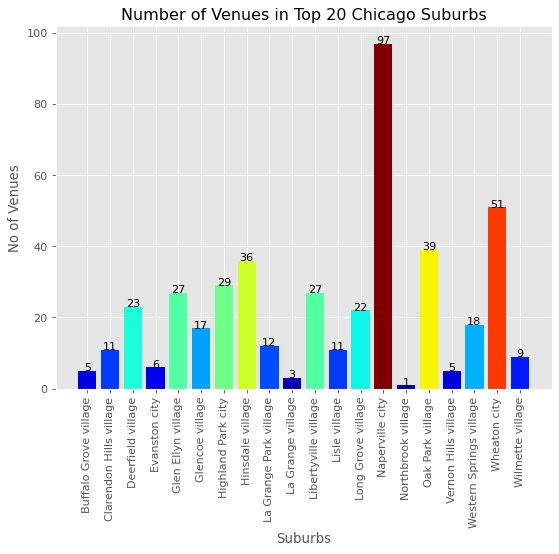

<Figure size 432x288 with 0 Axes>

In [207]:
from matplotlib.pyplot import figure
import matplotlib.cm as cm
from matplotlib.colors import Normalize

my_cmap = cm.get_cmap('jet')
 
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=60)

figure(num=None, figsize=(8, 6), dpi=80)
plt.bar(venue_count['Suburb'], venue_count['Venue'], align='center', color=my_cmap(my_norm(venue_count['Venue'])))
for a,b in zip(venue_count['Suburb'], venue_count['Venue']):
    plt.text(a, b, str(b), horizontalalignment='center')
plt.xticks(rotation=90)
plt.xlabel('Suburbs')
plt.ylabel('No of Venues')
plt.title('Number of Venues in Top 20 Chicago Suburbs')
plt.show()
plt.savefig('barchart.png')

In [216]:
ws= all_merged.loc[all_merged['Suburb'] == 'Western Springs village']
ws

,Suburb,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Western Springs village,13359,12948,0.032,0.318,0.157,0.784,161563,71004,0.032,2.79,41.809613,-87.900671,0,American Restaurant,History Museum,Bakery,Coffee Shop,Park,Optical Shop,Dessert Shop,Farmers Market,Library,Sports Bar


# Conclusion 

In [232]:
#Western Springs village is considered as the ideal location to start a new fine dining restaurant due to the following reasons

In [219]:
#1) High Median Income of $161,563
ws['MIncome']

7    161563
Name: MIncome, dtype: object

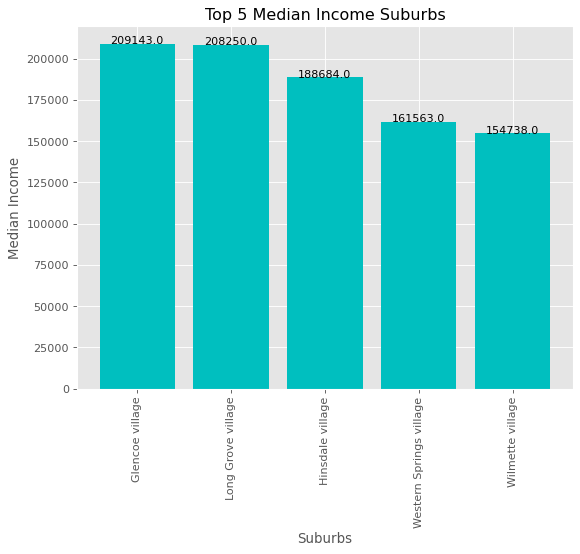

In [251]:
figure(num=None, figsize=(8, 6), dpi=80)


plt.bar(Top_MI['Suburb'], Top_MI['MIncome'],align='center', color='c')
for a,b in zip(Top_MI['Suburb'], Top_MI['MIncome']):
    plt.text(a, b, str(b), horizontalalignment='center')
plt.xticks(rotation=90)
plt.xlabel('Suburbs')
plt.ylabel('Median Income')
plt.title('Top 5 Median Income Suburbs')
plt.show()

In [256]:
#2) Location
# Western Springs village is located closer to some of the best suburbs like La Grange Park village, Clarendon Hills village,La Grange village,Hinsdale village
#These 5 Suburbs has an total population of 68,248
#Western Springs village is also located nearer to Tri State Tollway
#Hinsdale village is among top 5 richest suburb which is located nearer to Western Springs village
options=['Western Springs village','La Grange Park village', 'Clarendon Hills village','La Grange village','Hinsdale village']
nsub= all_merged.loc[all_merged['Suburb'].isin(options)]
nearest_suburb=nsub[['Suburb','PE2019','lat','lon']]
nearest_suburb

,Suburb,PE2019,lat,lon
0,Clarendon Hills village,8752,41.796124,-87.955143
6,Hinsdale village,17637,41.802460,-87.929984
7,Western Springs village,13359,41.809613,-87.900671
13,La Grange village,15322,41.805458,-87.874864
16,La Grange Park village,13178,41.833365,-87.867732


In [252]:
sum(nearest_suburb['PE2019'])

68248.0

In [255]:
#Mapping Suburbs nearer to Western Springs village

ns_map = folium.Map(location=[lat, lng], zoom_start=11)

for lat, lon, suburb in zip(nearest_suburb['lat'], nearest_suburb['lon'], nearest_suburb['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ns_map)
    
ns_map

In [258]:
#3) 78.4% of the adult population above 25 years holds a Bachelor's Degree
ws['Bdegree']

7    0.784
Name: Bdegree, dtype: object

In [259]:
nsub

,Suburb,PE2019,PE2010,PChange,U18,A65,Bdegree,MIncome,PCIncome,Poverty,Larea,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Clarendon Hills village,8752,8431,0.038,0.334,0.115,0.762,126500,73245,0.05,1.8,41.796124,-87.955143,0,Pizza Place,Thai Restaurant,Deli / Bodega,Sandwich Place,Mexican Restaurant,Platform,Coffee Shop,Train Station,Ice Cream Shop,American Restaurant
6,Hinsdale village,17637,16845,0.047,0.316,0.14,0.803,188684,92734,0.029,4.6,41.802460,-87.929984,0,Bakery,Yoga Studio,Shipping Store,Optical Shop,Massage Studio,Hot Dog Joint,Restaurant,Pizza Place,Pharmacy,Music Store
7,Western Springs village,13359,12948,0.032,0.318,0.157,0.784,161563,71004,0.032,2.79,41.809613,-87.900671,0,American Restaurant,History Museum,Bakery,Coffee Shop,Park,Optical Shop,Dessert Shop,Farmers Market,Library,Sports Bar
13,La Grange village,15322,15554,-0.015,0.292,0.143,0.63,121425,55516,0.036,2.52,41.805458,-87.874864,4,Home Service,Boutique,Flea Market,Yoga Studio,Donut Shop,Food Truck,Financial or Legal Service,Farmers Market,Electronics Store,Doctor's Office
16,La Grange Park village,13178,13580,-0.03,0.26,0.188,0.564,95466,45513,0.054,2.23,41.833365,-87.867732,0,Italian Restaurant,Pizza Place,Convenience Store,Pet Store,Gym / Fitness Center,Intersection,Chinese Restaurant,Sandwich Place,Miscellaneous Shop,Baseball Field


In [285]:
venues.head()

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Clarendon Hills village,41.796124,-87.955143,Little Creperie,41.795544,-87.954201,Sandwich Place
1,Clarendon Hills village,41.796124,-87.955143,Talley's Kitchen & Bar,41.795957,-87.954205,American Restaurant
2,Clarendon Hills village,41.796124,-87.955143,Domino's Pizza,41.796061,-87.954803,Pizza Place
3,Clarendon Hills village,41.796124,-87.955143,Starbucks,41.795560,-87.954420,Coffee Shop
4,Clarendon Hills village,41.796124,-87.955143,Metra - Clarendon Hills,41.797215,-87.953626,Train Station


In [286]:
venues_ns= venues.loc[venues['Suburb'].isin(options)]
venues_ns.head()

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Clarendon Hills village,41.796124,-87.955143,Little Creperie,41.795544,-87.954201,Sandwich Place
1,Clarendon Hills village,41.796124,-87.955143,Talley's Kitchen & Bar,41.795957,-87.954205,American Restaurant
2,Clarendon Hills village,41.796124,-87.955143,Domino's Pizza,41.796061,-87.954803,Pizza Place
3,Clarendon Hills village,41.796124,-87.955143,Starbucks,41.795560,-87.954420,Coffee Shop
4,Clarendon Hills village,41.796124,-87.955143,Metra - Clarendon Hills,41.797215,-87.953626,Train Station


In [262]:
venues_ns.shape

(80, 7)

In [283]:
lat1=41.809613 
lng1=-87.900671

nv_map = folium.Map(location=[lat1, lng1], zoom_start=13.47)

for lat, lon, venue in zip(venues_ns['Venue Latitude'], venues_ns['Venue Longitude'], venues_ns['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(nv_map)
    
nv_map

In [284]:
#4) Most of the venues in Western Springs village are located near the railway line. It is high recommended to open the restaurant in the downtown Western Springs village nearer to the intersection of Rail line and Wolf Road. 